<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Random_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing Packages**

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

### K-Means on a randomly generated dataset

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul>
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [6]:
np.random.seed(90)

In [8]:
X, y = make_blobs(n_samples = 5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

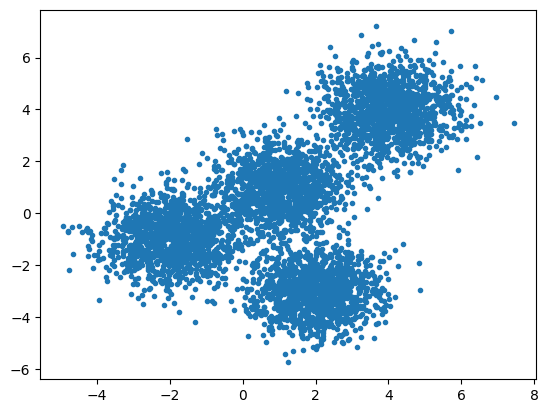

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [10]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

In [11]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>

In [12]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 3, 3, ..., 2, 0, 1], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [13]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.96352107, -0.99572943],
       [ 1.04449504,  1.02268495],
       [ 4.04347868,  4.00004756],
       [ 1.9905112 , -3.02184446]])

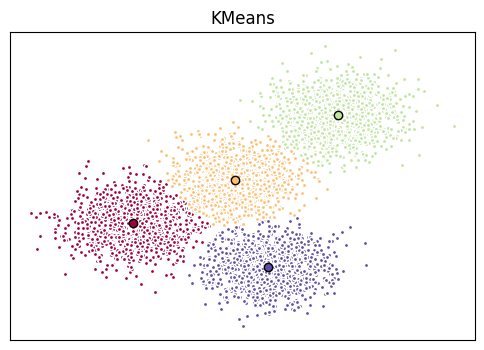

In [14]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [17]:
np.random.seed(90)

In [18]:
X, y = make_blobs(n_samples = 5000, centers=[[4, 4], [-2, -1], [1, 1]], cluster_std=0.9)

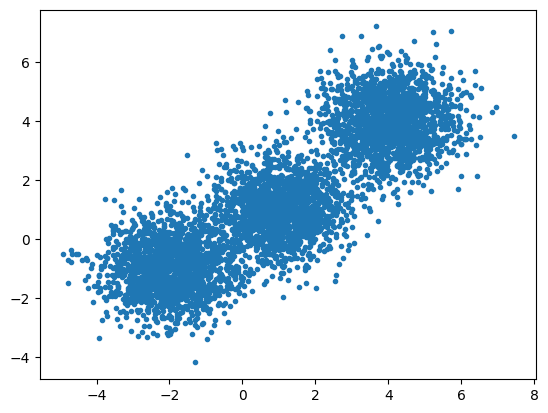

In [19]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [20]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)

In [23]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [24]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 0, 2, 1], dtype=int32)

In [25]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.04609908,  3.99687778],
       [ 1.01704999,  1.01920045],
       [-1.98169123, -1.01027618]])

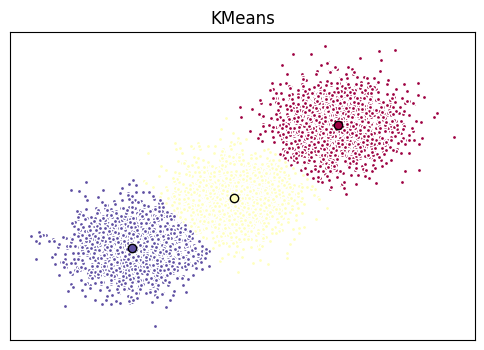

In [26]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
